In [2]:
import numpy as np

In [3]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Train shape:", X_train.shape)   # (60000, 28, 28)
print("Test shape:", X_test.shape)     # (10000, 28, 28)

print("First label:", y_train[0])
print("First image shape:", X_train[0].shape)

# Flatten the first image
vectorized = X_train[0].flatten()
print("Flattened length:", len(vectorized))
print("First 50 pixels:", vectorized[:50])


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
First label: 5
First image shape: (28, 28)
Flattened length: 784
First 50 pixels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
def equalizer(n):
    lis=np.zeros(10,dtype=int)
    lis[n]=1
    return lis

In [5]:
X=np.array([i.flatten() for i in X_test])
Y=np.array([equalizer(i) for i in y_test])
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [6]:
W = np.random.randn(784, 10) * 0.01 
b = np.zeros((1, 10))
epochs=1000
alpha=0.00005
W[0]
b

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m


In [8]:
cost=[]
for epoch in range(epochs):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    loss = cross_entropy(Y, y_pred)

    dz = y_pred - Y
    dW = (X.T @ dz) / X.shape[0]
    db = np.sum(dz, axis=0, keepdims=True) / X.shape[0]

    W -= alpha * dW
    b -= alpha * db

    if epoch % 10 == 0:
        cost.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 15.5200


/var/folders/zm/gf8ny5z13m70t3shtcspf3rh0000gp/T/ipykernel_99743/1924466686.py:8: RuntimeWarning: divide by zero encountered in matmul
  dW = (X.T @ dz) / X.shape[0]
/var/folders/zm/gf8ny5z13m70t3shtcspf3rh0000gp/T/ipykernel_99743/1924466686.py:8: RuntimeWarning: overflow encountered in matmul
  dW = (X.T @ dz) / X.shape[0]
/var/folders/zm/gf8ny5z13m70t3shtcspf3rh0000gp/T/ipykernel_99743/1924466686.py:8: RuntimeWarning: invalid value encountered in matmul
  dW = (X.T @ dz) / X.shape[0]


Epoch 10, Loss: 5.5291
Epoch 20, Loss: 3.5383
Epoch 30, Loss: 2.7792
Epoch 40, Loss: 2.3642
Epoch 50, Loss: 2.1001
Epoch 60, Loss: 1.9119
Epoch 70, Loss: 1.7690
Epoch 80, Loss: 1.6555
Epoch 90, Loss: 1.5627
Epoch 100, Loss: 1.4853
Epoch 110, Loss: 1.4198
Epoch 120, Loss: 1.3637
Epoch 130, Loss: 1.3149
Epoch 140, Loss: 1.2717
Epoch 150, Loss: 1.2326
Epoch 160, Loss: 1.1971
Epoch 170, Loss: 1.1644
Epoch 180, Loss: 1.1343
Epoch 190, Loss: 1.1063
Epoch 200, Loss: 1.0802
Epoch 210, Loss: 1.0558
Epoch 220, Loss: 1.0329
Epoch 230, Loss: 1.0113
Epoch 240, Loss: 0.9909
Epoch 250, Loss: 0.9715
Epoch 260, Loss: 0.9531
Epoch 270, Loss: 0.9356
Epoch 280, Loss: 0.9190
Epoch 290, Loss: 0.9031
Epoch 300, Loss: 0.8878
Epoch 310, Loss: 0.8733
Epoch 320, Loss: 0.8593
Epoch 330, Loss: 0.8459
Epoch 340, Loss: 0.8330
Epoch 350, Loss: 0.8206
Epoch 360, Loss: 0.8086
Epoch 370, Loss: 0.7971
Epoch 380, Loss: 0.7860
Epoch 390, Loss: 0.7753
Epoch 400, Loss: 0.7649
Epoch 410, Loss: 0.7550
Epoch 420, Loss: 0.7453
E

In [12]:
def num(lis):
    mx=[0,0]
    for number,i in enumerate(lis):
        if i>mx[1]:
            lis=[number,i]
            print(lis)
    return mx[0]

In [ ]:
xt=np.array([i.flatten() for i in X_train])
yt=np.array([equalizer(i) for i in y_train])

def accuracy(y_true, y_pred):
    true_classes = np.argmax(y_true, axis=1)
    pred_classes = np.argmax(y_pred, axis=1)
    return np.mean(true_classes == pred_classes)
z_test = np.dot(xt, W) + b
y_pred_test = softmax(z_test)

test_acc = accuracy(yt, y_pred_test)
print(f"\nFinal Test Accuracy: {test_acc*100:.4f}")
print(W)


Final Test Accuracy: 85.3083
[[-0.0091618  -0.00489977 -0.02127769 ...  0.01095182 -0.00176017
   0.00112495]
 [ 0.01439813 -0.01552338 -0.00136572 ... -0.00085028 -0.00395406
  -0.00603464]
 [-0.01569701  0.01046923 -0.00492051 ...  0.0065363  -0.02416408
  -0.00890213]
 ...
 [ 0.00571834 -0.00528064 -0.00377751 ...  0.02125512  0.0089779
  -0.00944057]
 [ 0.00135785  0.00426786  0.00666773 ... -0.00786932 -0.01307671
   0.00437137]
 [ 0.00316264 -0.02538461  0.01432895 ...  0.01397712  0.0132262
  -0.0027353 ]]


<Axes: >

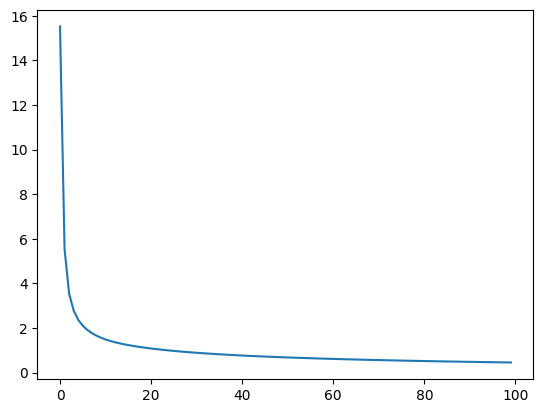

In [11]:
import seaborn as sns
sns.lineplot(cost)


In [14]:
np.save("weights.npy", W)
np.save("bias.npy", b)